In [11]:
#install tensorflow to get access to the keras dataset
!pip install tensorflow

python(74370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Using cached tensorflow-2.17.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.66.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (3.9 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.met

In [12]:
import tensorflow as tf
print(tf.__version__)  # Should display the installed version

2.17.0


In [13]:
#install scikit-learn for tasks such as partitioning dataset into training and validation sets
!pip install scikit-learn

python(74650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [15]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

Load dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [17]:
# Normalize pixel values (0-255 -> 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Partition training set into training and validation sets

In [18]:
from sklearn.model_selection import train_test_split

# Split 10% of the training data for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a simple CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
#Compile the model... Here, you define the loss function, optimizer, and metrics:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
#5 Train the model
# Define the number of epochs and include validation data for tuning:

history = model.fit(x_train, y_train,
                    epochs=20,  # Adjust the number of epochs based on early stopping or training curves
                    validation_data=(x_val, y_val),
                    batch_size=64)  # Adjust batch size based on memory capacity

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 83ms/step - accuracy: 0.3708 - loss: 1.7283 - val_accuracy: 0.5856 - val_loss: 1.1902
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 48s 68ms/step - accuracy: 0.5836 - loss: 1.1726 - val_accuracy: 0.6402 - val_loss: 1.0335
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 51s 73ms/step - accuracy: 0.6416 - loss: 1.0243 - val_accuracy: 0.6510 - val_loss: 1.0037
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 52s 73ms/step - accuracy: 0.6819 - loss: 0.9070 - val_accuracy: 0.6858 - val_loss: 0.8990
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 61s 86ms/step - accuracy: 0.7145 - loss: 0.8155 - val_accuracy: 0.7026 - val_loss: 0.8513
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.7423 - loss: 0.7389 - val_accuracy: 0.6966 - val_loss: 0.8756
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.7652 - loss: 0.6704 - val_accuracy: 0.7206 - val_loss: 0.8219
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.7835 - loss: 0.6098 - 

In [ ]:
# Evaluating the Model
# Once the model has finished learning, we check how well it performs on the test data.

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7352 - loss: 1.0581
Test accuracy: 0.7318000197410583


In [23]:
#test model .... install pillow to handle images
!pip install pillow

python(76788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


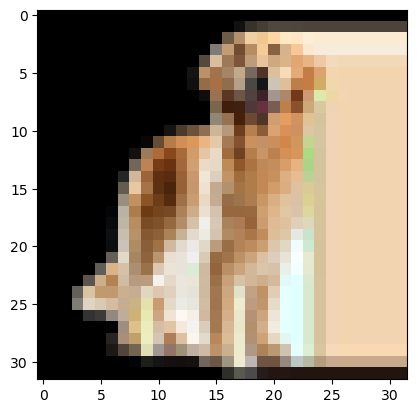

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and preprocess your image
def load_and_preprocess_image(image_path):
    # Open the image file
    img = Image.open(image_path)
    
    # Ensure the image has 3 channels (RGB), even if it's RGBA (with transparency)
    img = img.convert('RGB')

    # Resize the image to 32x32 pixels (as CIFAR-10 images are 32x32)
    img = img.resize((32, 32))
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    
    # Plot the image for reference
    plt.imshow(img_array)
    plt.show()
    
    # Scale pixel values to the [0, 1] range (just like we did for training images)
    img_array = img_array.astype('float32') / 255.0
    
    # Expand dimensions to match the model's expected input shape (1, 32, 32, 3)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

# Path to your image
image_path = 'image.png'

# Preprocess the image
test_image = load_and_preprocess_image(image_path)

3. Use the Model to Predict the Object Category
Now that the image is loaded and preprocessed, you can pass it to your trained model to get a prediction.

In [27]:
# Use the trained model to predict the class
predictions = model.predict(test_image)

# CIFAR-10 class names (since predictions will be numbers 0-9)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Get the predicted class (the highest probability)
predicted_class = np.argmax(predictions)

# Output the predicted class name
print(f"The model predicts this is a: {class_names[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
The model predicts this is a: dog
